**Classical Machine Learning Methods**

Data Preparation and Feature Engineering

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.sparse import issparse

#  Loading the Data

print("Loading data...")
try:
    df = pd.read_csv('Loan_default.csv')
    print("Data loaded successfully. Shape:", df.shape)
except FileNotFoundError:
    print("ERROR: 'Loan_default.csv' not found. Please upload the file to your Colab environment.")
    df = pd.DataFrame()

if not df.empty:
    # Dropping non-predictive columns
    df = df.drop('LoanID', axis=1)

    # Separating Features and Target
    X = df.drop('Default', axis=1)
    y = df['Default']

    # Identifying Column Types
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X.select_dtypes(include='object').columns.tolist()

    # Creating Preprocessing Pipelines

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combining Preprocessing Steps using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )

    # Applying the Preprocessor to the entire dataset
    X_processed = preprocessor.fit_transform(X)
    if issparse(X_processed):
        X_processed = X_processed.toarray()

    try:
        all_feature_names = preprocessor.get_feature_names_out()

        feature_names = [name.split('__')[-1] for name in all_feature_names]

        X_processed_df = pd.DataFrame(X_processed, columns=feature_names)
    except Exception as e:
        print(f"Warning: Could not extract detailed feature names. Error: {e}")

        X_processed_df = pd.DataFrame(X_processed)

    print("\nPreprocessing complete. Final feature matrix shape:", X_processed_df.shape)

    # Splitting the Data into Training and Testing Sets

    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42, stratify=y)

    print(f"Data split: Training size: {X_train.shape[0]}, Testing size: {X_test.shape[0]}")
    print("X train, X test, y train, y test are ready for modeling.")

Loading data...
Data loaded successfully. Shape: (255347, 18)

Preprocessing complete. Final feature matrix shape: (255347, 31)
Data split: Training size: 204277, Testing size: 51070
X train, X test, y train, y test are ready for modeling.


**Logistic Regression Model Training and Evaluation**


Model 1: Logistic Regression 
Logistic Regression model trained.

Accuracy (Logistic Regression): 0.8853

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.61      0.03      0.06      5931

    accuracy                           0.89     51070
   macro avg       0.75      0.52      0.50     51070
weighted avg       0.85      0.89      0.84     51070



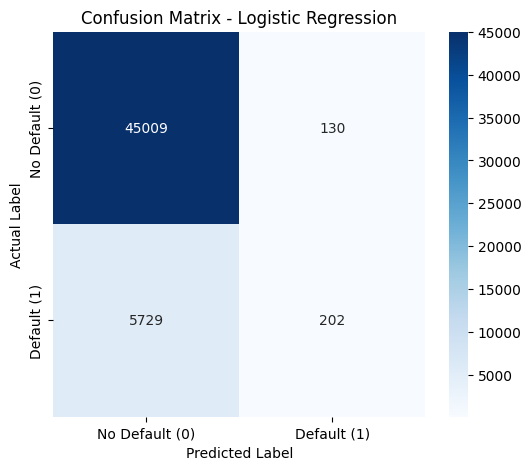

Logistic Regression F1-Score (Default): 0.0645
Logistic Regression results stored.


In [2]:
import json
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
try:
    if 'X_train' not in globals():
        raise NameError
except NameError:
    print("Please run Part 1 (data_prep_part1.py) first to prepare the data.")
    exit()
global results
if 'results' not in globals():
    results = {}

print("\nModel 1: Logistic Regression ")

# Initializing and Training the Model
log_reg = LogisticRegression(solver='liblinear', random_state=42) # 'liblinear' is good for small datasets
log_reg.fit(X_train, y_train)

print("Logistic Regression model trained.")

# Making Predictions
y_pred_lr = log_reg.predict(X_test)

# Evaluating the Model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print(f"\nAccuracy (Logistic Regression): {accuracy_lr:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default (0)', 'Default (1)'],
            yticklabels=['No Default (0)', 'Default (1)'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

f1_score_lr = report_lr['1']['f1-score']
results['Logistic Regression'] = {'Accuracy': accuracy_lr, 'F1_Score_Default': f1_score_lr}
print(f"Logistic Regression F1-Score (Default): {f1_score_lr:.4f}")
print("Logistic Regression results stored.")

**Decision Tree Classifier Model Training and Evaluation**


Model 2: Decision Tree Classifier 
Decision Tree Classifier trained.

Accuracy (Decision Tree Classifier): 0.8849

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.63      0.02      0.04      5931

    accuracy                           0.88     51070
   macro avg       0.76      0.51      0.49     51070
weighted avg       0.86      0.88      0.83     51070



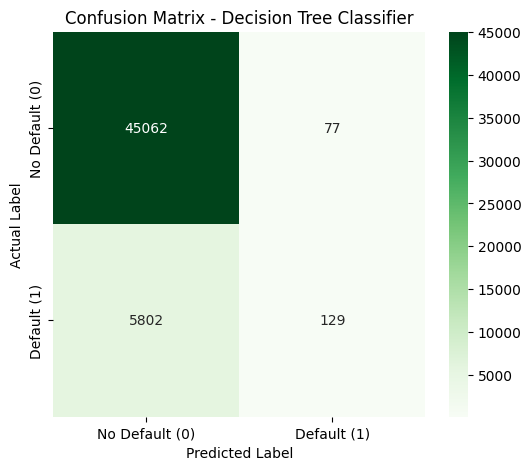

Decision Tree F1-Score (Default): 0.0420

Decision Tree results stored. Run Part 4 for final comparison.


In [3]:
import json
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
try:
    if 'X_train' not in globals() or 'results' not in globals():
        raise NameError
except NameError:
    print("Please run Part 1 and Part 2 first to prepare the data and train the first model.")
    exit()

print("\nModel 2: Decision Tree Classifier ")

#  Initializing and Training the Model
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)

print("Decision Tree Classifier trained.")

#  Making Predictions
y_pred_dt = dt_clf.predict(X_test)

#  Evaluating the Model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"\nAccuracy (Decision Tree Classifier): {accuracy_dt:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# 4. Visualize the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Default (0)', 'Default (1)'],
            yticklabels=['No Default (0)', 'Default (1)'])
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
global results
f1_score_dt = report_dt['1']['f1-score']
results['Decision Tree'] = {'Accuracy': accuracy_dt, 'F1_Score_Default': f1_score_dt}
print(f"Decision Tree F1-Score (Default): {f1_score_dt:.4f}")
print("\nDecision Tree results stored. Run Part 4 for final comparison.")

**Comparison of Both Models**


--- Model Comparison Focused on F1-Score (Default Class) ---
| Model               |   Accuracy |   F1_Score_Default |
|:--------------------|-----------:|-------------------:|
| Logistic Regression |     0.8853 |             0.0645 |
| Decision Tree       |     0.8849 |             0.0420 |


/tmp/ipython-input-4116717886.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1_Score_Default', data=comparison_df, palette='cividis')


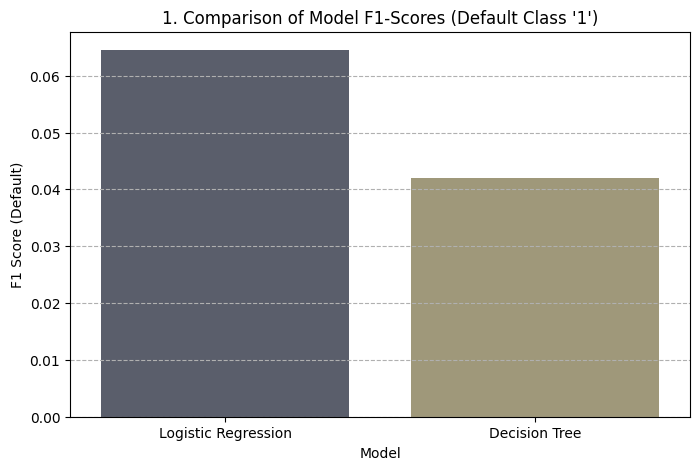

/tmp/ipython-input-4116717886.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=comparison_df_acc, palette='viridis')


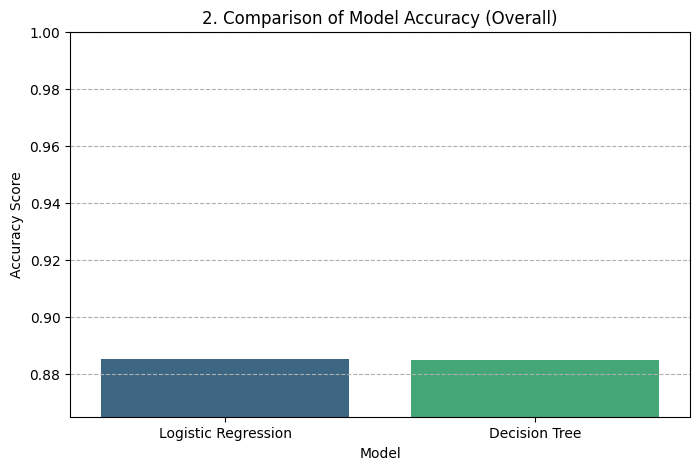

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    if 'results' not in globals() or len(results) < 2:
        print("Error: The 'results' dictionary is missing or incomplete. Please run Part 1, Part 2 (Logistic Regression), and Part 3 (Decision Tree) first.")
        exit()
except NameError:
    print("Error: The 'results' dictionary is missing. Please run Part 1, Part 2 (Logistic Regression), and Part 3 (Decision Tree) first.")
    exit()

print("\n--- Model Comparison Focused on F1-Score (Default Class) ---")

# Extracting F1-Scores and create DataFrame
data = {
    'Model': list(results.keys()),
    'Accuracy': [results[model]['Accuracy'] for model in results],
    'F1_Score_Default': [results[model]['F1_Score_Default'] for model in results]
}

comparison_df = pd.DataFrame(data)
comparison_df = comparison_df.sort_values(by='F1_Score_Default', ascending=False)

# Displaying comparison table
print(comparison_df.to_markdown(index=False, floatfmt=".4f"))

#Plot 1: F1-Score Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='F1_Score_Default', data=comparison_df, palette='cividis')
plt.title("1. Comparison of Model F1-Scores (Default Class '1')")
plt.ylabel('F1 Score (Default)')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--')
plt.show()

# --- Plot 2: Accuracy Comparison

comparison_df_acc = comparison_df.sort_values(by='Accuracy', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=comparison_df_acc, palette='viridis')
plt.title("2. Comparison of Model Accuracy (Overall)")
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--')
min_acc = comparison_df_acc['Accuracy'].min()
plt.ylim(min_acc - 0.02, 1.0)
plt.show()



**Conclusion for Classical ML Methods**

The model with the higher F1-Score for the Default class is considered the better model for predicting actual loan defaults, as this metric best balances the need for high Precision and high Recall. The Accuracy plot provides context for the overall classification performance. So in our case the logistic regression model is slightly better than the decision tree model

**Neural Network Model Setup**

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall

# Setting seed for reproducibility
tf.random.set_seed(42)

# Checking for data and setting up global variables
try:
    if 'X_train' not in globals():
        raise NameError("Data not loaded. Please run Part 1 first.")
except NameError as e:
    print(f"ERROR: {e}")
    exit()

input_features = X_train.shape[1]
print(f"Input features size: {input_features}")

# Defining the Neural Network Architecture
def create_nn_model(input_shape):
    """
    Creates a simple Sequential Neural Network model for binary classification (default/no-default).

    Architecture:
    - Input Layer matches the number of preprocessed features
    - Hidden Layer 1: 64 neurons, ReLU activation
    - Dropout Layer: 20% to prevent overfitting
    - Hidden Layer 2: 32 neurons, ReLU activation
    - Output Layer: 1 neuron, Sigmoid activation
    """
    model = Sequential([
        # Input Layer / Hidden Layer 1
        Dense(64, activation='relu', input_shape=(input_shape,), name='Hidden_Layer_1'),

        # Regularization layer
        Dropout(0.2, name='Dropout_1'),

        # Hidden Layer 2
        Dense(32, activation='relu', name='Hidden_Layer_2'),

        # Output Layer: 1 neuron with sigmoid activation for binary classification
        Dense(1, activation='sigmoid', name='Output_Layer')
    ])
    return model

# Creating and Compiling the Model
nn_model = create_nn_model(input_features)

# Since the data is imbalanced, we will use the Adam optimizer and track F1-related metrics.
# Binary Crossentropy is the standard loss for binary classification.
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='auc')
    ]
)

# Displaying the model summary
nn_model.summary()

# Making the model globally accessible for the next part
global nn_model
print("\nNeural Network Model compiled and ready for training.")

Input features size: 31


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 64)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,161 (16.25 KB)

 Trainable params: 4,161 (16.25 KB)

 Non-trainable params: 0 (0.00 B)


Neural Network Model compiled and ready for training.


**Neural Network Training and Evaluation**


Training the Neural Network Model 
Epoch 1/50
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8847 - auc: 0.7450 - loss: 0.3177 - precision: 0.5757 - recall: 0.0488 - val_accuracy: 0.8869 - val_auc: 0.7532 - val_loss: 0.3107 - val_precision: 0.6164 - val_recall: 0.0384
Epoch 2/50
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8851 - auc: 0.7485 - loss: 0.3162 - precision: 0.5810 - recall: 0.0582 - val_accuracy: 0.8870 - val_auc: 0.7523 - val_loss: 0.3108 - val_precision: 0.5789 - val_recall: 0.0563
Epoch 3/50
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8849 - auc: 0.7493 - loss: 0.3159 - precision: 0.5699 - recall: 0.0571 - val_accuracy: 0.8878 - val_auc: 0.7541 - val_loss: 0.3102 - val_precision: 0.6067 - val_recall: 0.0619
Epoch 4/50
5746/5746 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.8852 - auc: 0.7503 - loss: 0.3155 - precision: 0.5848 - recall: 0.0575 - val_accuracy: 0.8876 - val_auc: 0.7543 - val_loss: 0.3102 - val_precision: 0.6000 - val

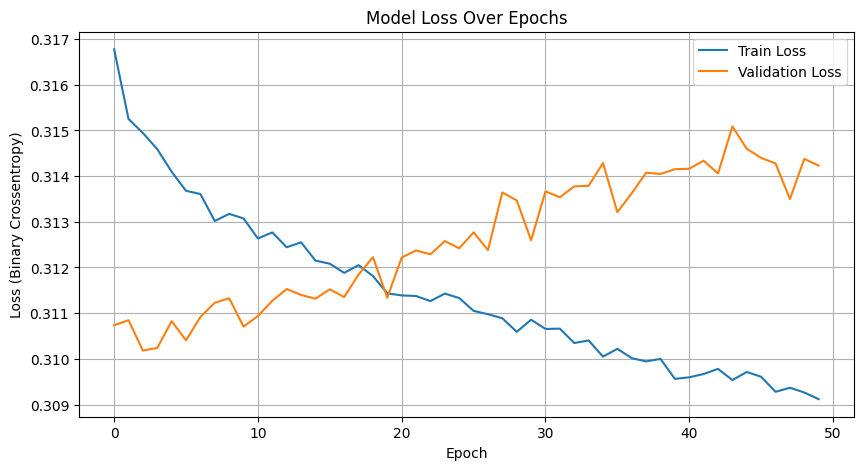

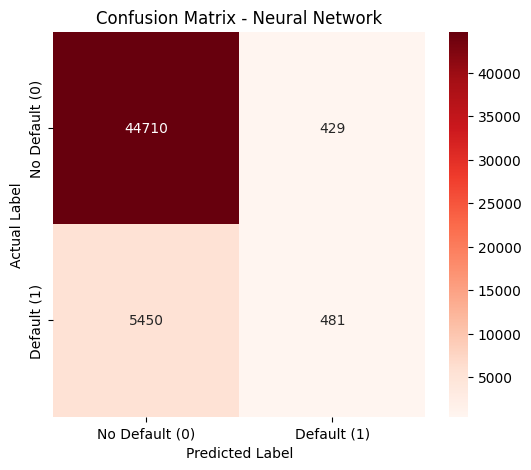


Neural Network training and evaluation complete. 


In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns

# Setting seed for reproducibility
tf.random.set_seed(42)

# Checking for dependencies
try:
    if 'X_train' not in globals() or 'nn_model' not in globals():
        raise NameError("Dependencies missing. Please run previous parts first.")
except NameError as e:
    print(f"ERROR: {e}")
    exit()

# Converting pandas DataFrames to NumPy arrays for Keras
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values

print("\nTraining the Neural Network Model ")

# Training the model

history = nn_model.fit(
    X_train_np,
    y_train_np,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Evaluating the Model on the Test Set
print("\nEvaluating on Test Data ")
loss, accuracy, precision, recall, auc = nn_model.evaluate(X_test_np, y_test_np, verbose=0)

# Calculating F1-Score
y_pred_prob = nn_model.predict(X_test_np, verbose=0)
y_pred_binary = (y_pred_prob > 0.5).astype("int32")

# Calculating F1-score specifically for the positive class
f1 = f1_score(y_test_np, y_pred_binary, average='binary')

print(f"\nTest Metrics:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  AUC: {auc:.4f}")
print(f"  F1-Score (Default): {f1:.4f}")

# Storing results for comparison
global nn_results
nn_results = {
    'Model': 'Neural Network (Keras)',
    'Accuracy': accuracy,
    'F1_Score_Default': f1
}

# Visualizing Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss (Binary Crossentropy)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Visualizing Confusion Matrix
cm = confusion_matrix(y_test_np, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Default (0)', 'Default (1)'],
            yticklabels=['No Default (0)', 'Default (1)'])
plt.title('Confusion Matrix - Neural Network')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nNeural Network training and evaluation complete. ")

**Final Comparison Between Neural Network Model and Classical Machine Learning Models**


Final Model Comparison Classical ML vs Neural Network: 

Combined Comparison Table (Sorted by F1-Score):
| Model                  |   Accuracy |   F1_Score_Default |
|:-----------------------|-----------:|-------------------:|
| Neural Network (Keras) |     0.8849 |             0.1406 |
| Logistic Regression    |     0.8853 |             0.0645 |
| Decision Tree          |     0.8849 |             0.0420 |


/tmp/ipython-input-1617330621.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1_Score_Default', data=comparison_df, palette='Spectral')


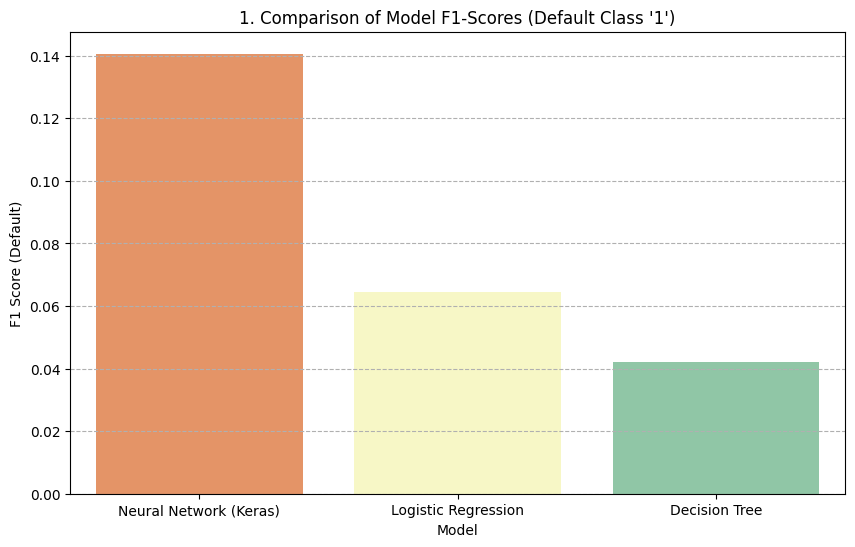

/tmp/ipython-input-1617330621.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=comparison_df_acc, palette='flare')


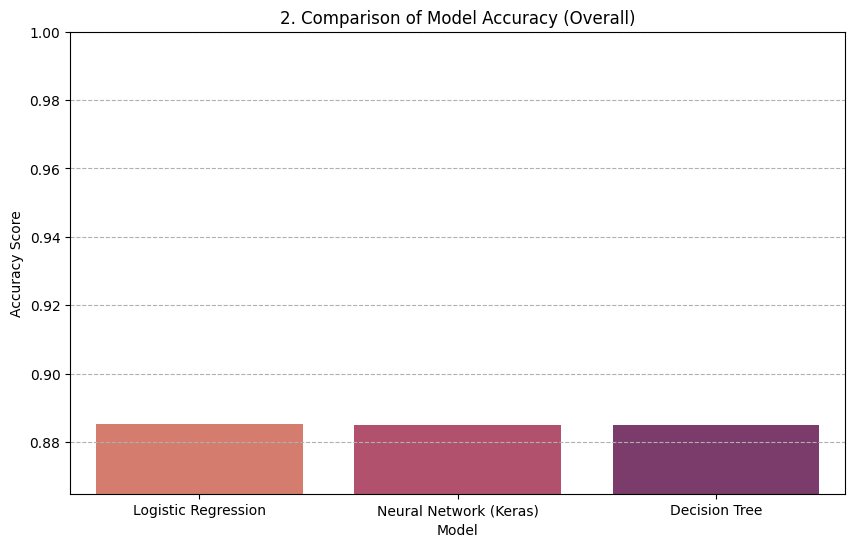

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Checking for dependencies
try:
    if 'results' not in globals() or 'nn_results' not in globals():
        raise NameError("Results dictionary missing. Please run previous parts first.")
except NameError as e:
    print(f"ERROR: {e}")
    exit()

print("\nFinal Model Comparison Classical ML vs Neural Network: ")

# Combining all results
all_results = [
    {'Model': 'Logistic Regression', 'Accuracy': results['Logistic Regression']['Accuracy'], 'F1_Score_Default': results['Logistic Regression']['F1_Score_Default']},
    {'Model': 'Decision Tree', 'Accuracy': results['Decision Tree']['Accuracy'], 'F1_Score_Default': results['Decision Tree']['F1_Score_Default']},
    nn_results
]

comparison_df = pd.DataFrame(all_results)
comparison_df = comparison_df.sort_values(by='F1_Score_Default', ascending=False)

# Displaying comparison table
print("\nCombined Comparison Table (Sorted by F1-Score):")
print(comparison_df.to_markdown(index=False, floatfmt=".4f"))

# Plot 1: F1-Score Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1_Score_Default', data=comparison_df, palette='Spectral')
plt.title("1. Comparison of Model F1-Scores (Default Class '1')")
plt.ylabel('F1 Score (Default)')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--')
plt.show()

# Plot 2: Accuracy Comparison
comparison_df_acc = comparison_df.sort_values(by='Accuracy', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=comparison_df_acc, palette='flare')
plt.title("2. Comparison of Model Accuracy (Overall)")
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--')
# Dynamic adjustment for better visualization
min_acc = comparison_df_acc['Accuracy'].min()
plt.ylim(min_acc - 0.02, 1.0)
plt.show()



**Conclusion after comparison of all three models**

The Neural Network achieved a better F1-Score than classical models because its layered structure can capture more complex interactions between features, which is essential for identifying rare events like loan defaults. However the difference of accuracies between all three models is very less and all three models achieve almost 90 percent accuracies so all three models have performed well on the dataset.